# Estatísticas Gerais do Desafio de Filmes 2025

In [2]:
# %pip install wordcloud

import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from collections import Counter

df = pd.read_csv('stats.csv')
df.head()

,Filme,Título original,País,Ano,Duração,Gênero,Dirigido por,Categoria,Assistido por,Animação
0,O Grande Hotel Budapeste,The Grand Budapest Hotel,EUA,2014,100,"Comédia, Drama",Wes Anderson,NaN,ok1na,0
1,Avatar 2 - O Caminho da Água,Avatar: The Way of Water,EUA,2022,192,"Sci-Fi, Ação, Aventura",James Cameron,8.0,EdzinhoHowlett,0
2,Túmulo dos Vagalumes,火垂るの墓,Japão,1988,89,"Guerra, Aventura",Isao Takahata,1.0,aNobree,1
3,O Peso do Talento,The Unbearable Weight of Massive Talent,EUA,2022,107,"Crime, Ação, Comédia",Tom Gormican,4.0,UmaPessoaHumana,0
4,Eu Vi o Brilho da TV,I Saw the TV Glow,EUA,2024,100,"Drama, Terror",Jane Schoenbrun,4.0,belovacomis,0


## 1. Análise de Tempo Assistido

### 1.2 Duração dos filmes

════════════════════════════════════════════════════════════
          ANÁLISE DE DURAÇÃO DOS FILMES ASSISTIDOS          
════════════════════════════════════════════════════════════

FILME MAIS LONGO:       E o Vento Levou (233 minutos)
FILME MAIS CURTO:        A Crocodile Who Lived for 100 Days (62 minutos)



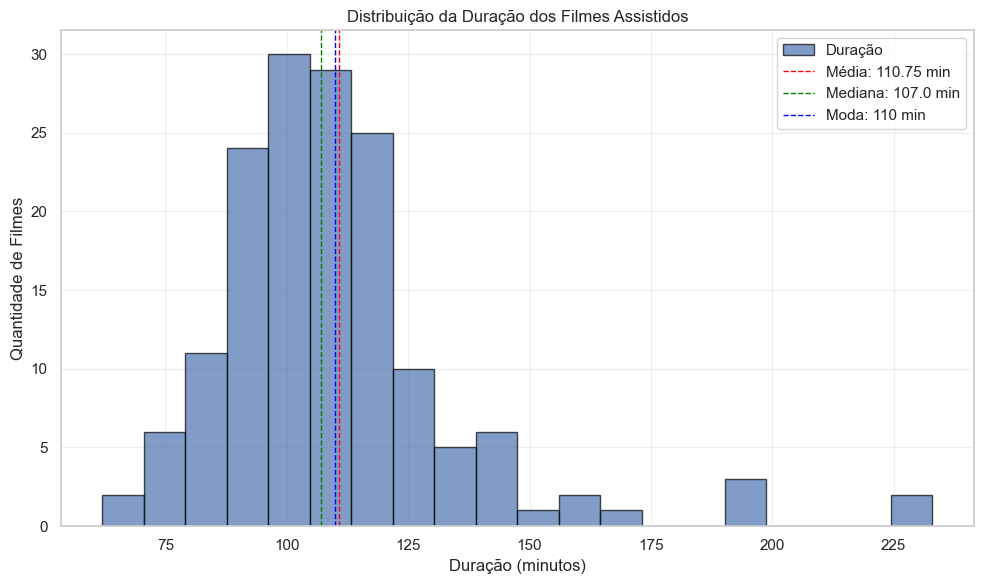

In [24]:
filme_mais_longo = df.loc[df['Duração'].idxmax()]
filme_mais_curto = df.loc[df['Duração'].idxmin()]

media_duracao = df['Duração'].mean()
mediana_duracao = df['Duração'].median()
moda_duracao = df['Duração'].mode()[0]

## Apresentação dos Resultados
print("═" * 60)
print("ANÁLISE DE DURAÇÃO DOS FILMES ASSISTIDOS".center(60))
print("═" * 60)
print(f"\nFILME MAIS LONGO:".ljust(25) + f"{filme_mais_longo['Filme']} ({filme_mais_longo['Duração']} minutos)")
print(f"FILME MAIS CURTO:".ljust(25) + f"{filme_mais_curto['Filme']} ({filme_mais_curto['Duração']} minutos)\n")

## Visualização Gráfica
plt.figure(figsize=(10, 6))
df['Duração'].plot(kind='hist', bins=20, edgecolor='black', alpha=0.7)
plt.axvline(media_duracao, color='red', linestyle='dashed', linewidth=1, label=f'Média: {media_duracao:.2f} min')
plt.axvline(mediana_duracao, color='green', linestyle='dashed', linewidth=1, label=f'Mediana: {mediana_duracao} min')
plt.axvline(moda_duracao, color='blue', linestyle='dashed', linewidth=1, label=f'Moda: {moda_duracao} min')
plt.title('Distribuição da Duração dos Filmes Assistidos')
plt.xlabel('Duração (minutos)')
plt.ylabel('Quantidade de Filmes')
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

### 1.2 Tempo assistido por pessoa

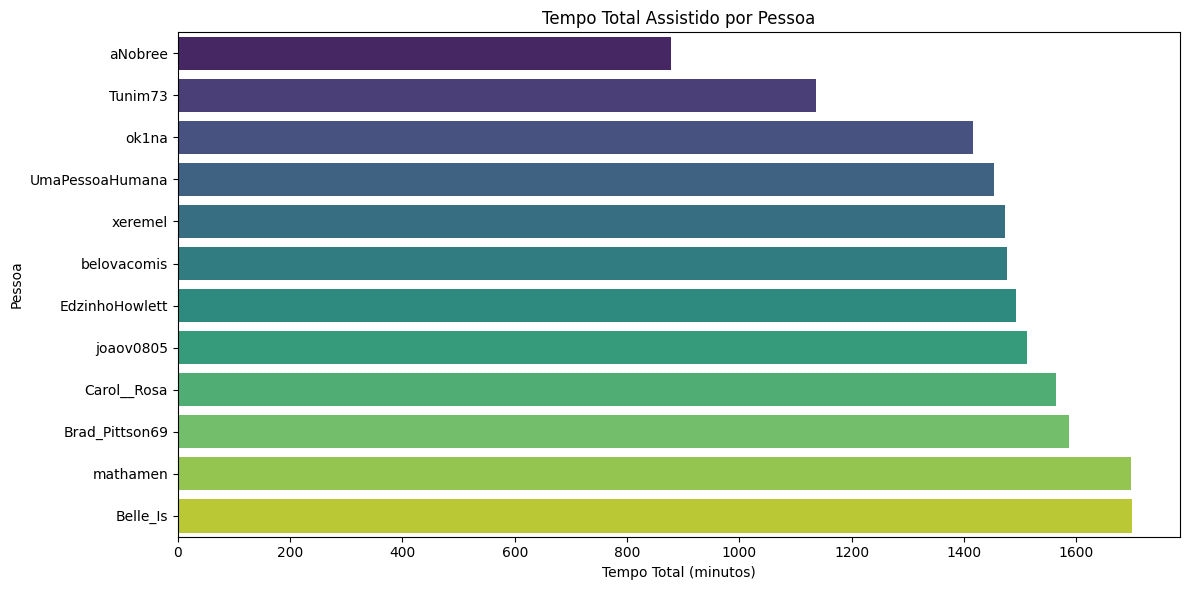

In [18]:
tempo_total_por_pessoa = df.groupby('Assistido por')['Duração'].sum()
tempo_total_ordenado = tempo_total_por_pessoa.sort_values(ascending=True)

df_plot = pd.DataFrame({
    'Pessoa': tempo_total_ordenado.index,
    'Tempo': tempo_total_ordenado.values
})

plt.figure(figsize=(12,6))
sns.barplot(data=df_plot, x='Tempo', y='Pessoa', hue='Pessoa', palette='viridis', dodge=False, legend=False)
plt.title('Tempo Total Assistido por Pessoa')
plt.xlabel('Tempo Total (minutos)')
plt.ylabel('Pessoa')
plt.tight_layout()
plt.show()

## 2. Gêneros mais vistos

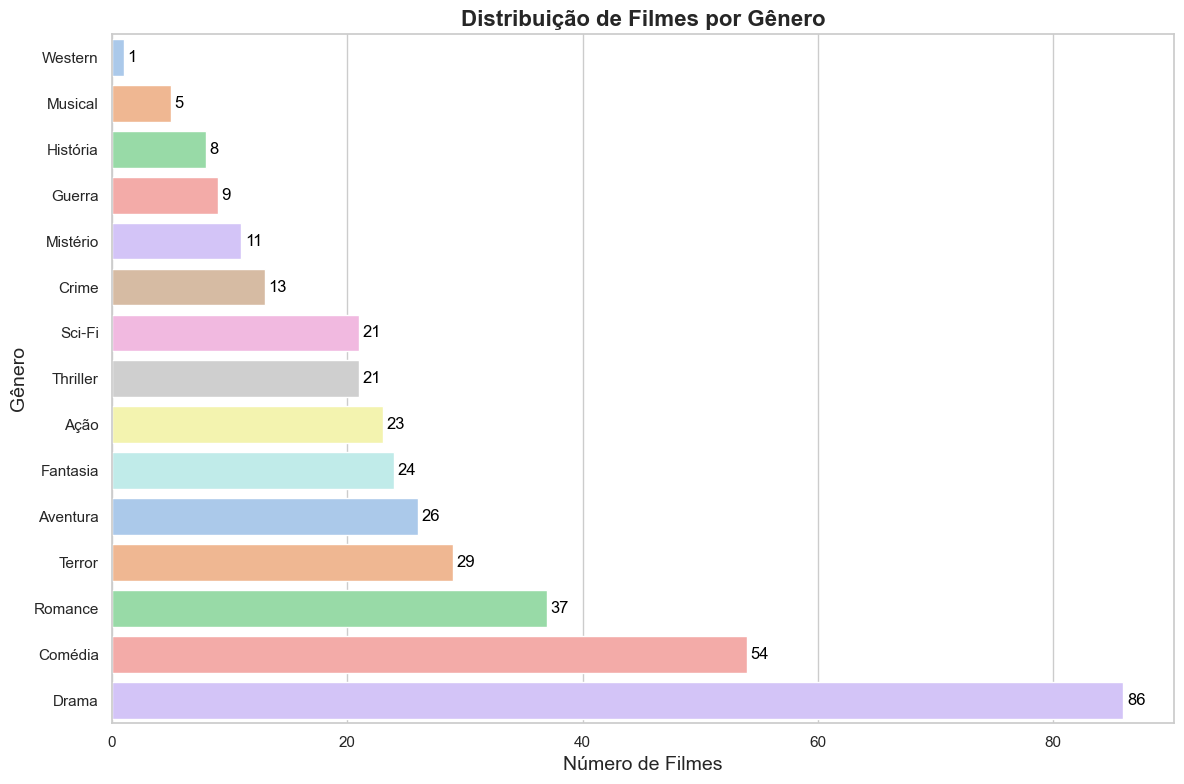

In [26]:
sns.set_theme(style='whitegrid')

df_generos = df.assign(Gênero=df['Gênero'].str.split(', ')).explode('Gênero')

contagem_generos = df_generos['Gênero'].value_counts().sort_values(ascending=True)

# Criar DataFrame para facilitar o uso do hue
df_plot = pd.DataFrame({
    'Gênero': contagem_generos.index,
    'Quantidade': contagem_generos.values
})

plt.figure(figsize=(12, 8))
palette = sns.color_palette('pastel', len(df_plot))

barplot = sns.barplot(data=df_plot, x='Quantidade', y='Gênero', hue='Gênero', palette=palette, dodge=False, legend=False)

plt.title('Distribuição de Filmes por Gênero', fontsize=16, weight='bold')
plt.xlabel('Número de Filmes', fontsize=14)
plt.ylabel('Gênero', fontsize=14)

for i, v in enumerate(df_plot['Quantidade']):
    barplot.text(v + 0.3, i, str(v), color='black', va='center', fontsize=12)

plt.tight_layout()
plt.show()

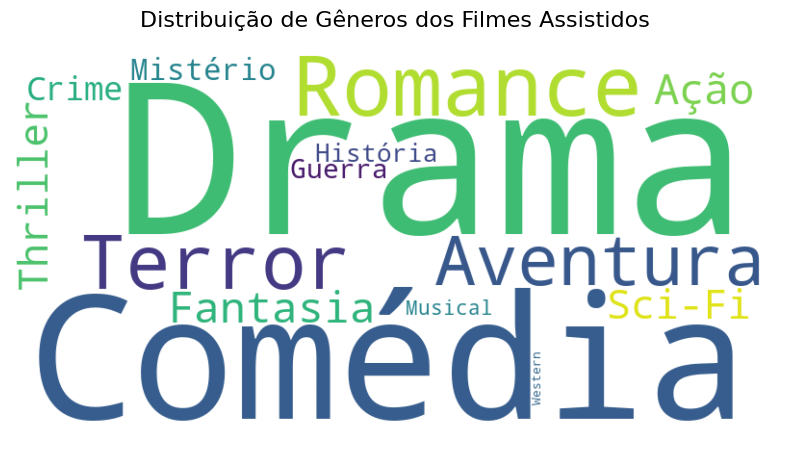

In [6]:
generos = df['Gênero'].str.split(', ').sum()

# Contamos a frequência de cada gênero
contagem_generos = Counter(generos)

# Criando a WordCloud
wordcloud = WordCloud(
    width=800,
    height=400,
    background_color='white',
    colormap='viridis',  # Pode mudar para 'plasma', 'magma', 'inferno', etc.
    max_words=50,
    prefer_horizontal=0.9
).generate_from_frequencies(contagem_generos)

# Configurando a visualização
plt.figure(figsize=(8, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Distribuição de Gêneros dos Filmes Assistidos', pad=20, size=16)
plt.tight_layout()
plt.show()

## 3. Distribuição de Décadas

In [7]:
filme_mais_antigo = df.loc[df['Ano'].idxmin()]
ano_mais_novo = df['Ano'].max()
filmes_mais_novos = df[df['Ano'] == ano_mais_novo]

media_ano = df['Ano'].mean()
mediana_ano = df['Ano'].median()
moda_ano = df['Ano'].mode()[0]

print(f"Filme mais antigo: {filme_mais_antigo['Filme']} ({filme_mais_antigo['Ano']})")
print(f"Filmes mais novos ({ano_mais_novo}):")
for idx, filme in filmes_mais_novos.iterrows():
    print(f"  - {filme['Filme']} ({filme['País']})")
print(f"Média dos anos: {media_ano:.2f}")
print(f"Mediana dos anos: {mediana_ano}")
print(f"Moda dos anos: {moda_ano}")

Filme mais antigo: A Carruagem Fantasma (1921)
Filmes mais novos (2025):
  - Guerreiras do K-Pop (EUA)
  - Quarteto Fantástico: Primeiros Passos (EUA)
  - Superman (EUA)
  - Materialistas (EUA)
  - Quarteto Fantástico: Primeiros Passos (EUA)
  - Guerreiras do K-Pop (EUA)
  - Premonição 6: Laços de Sangue (EUA)
  - Premonição 6: Laços de Sangue (EUA)
  - Quarteto Fantástico: Primeiros Passos (EUA)
  - Separados pelas Estrelas (Coreia do Sul)
  - Jurassic World: Recomeço (EUA)
Média dos anos: 2002.36
Mediana dos anos: 2007.0
Moda dos anos: 2023


C:\Users\User\AppData\Local\Temp\ipykernel_34468\2773120642.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=filmes_por_decada.index, y=filmes_por_decada.values, palette="viridis")


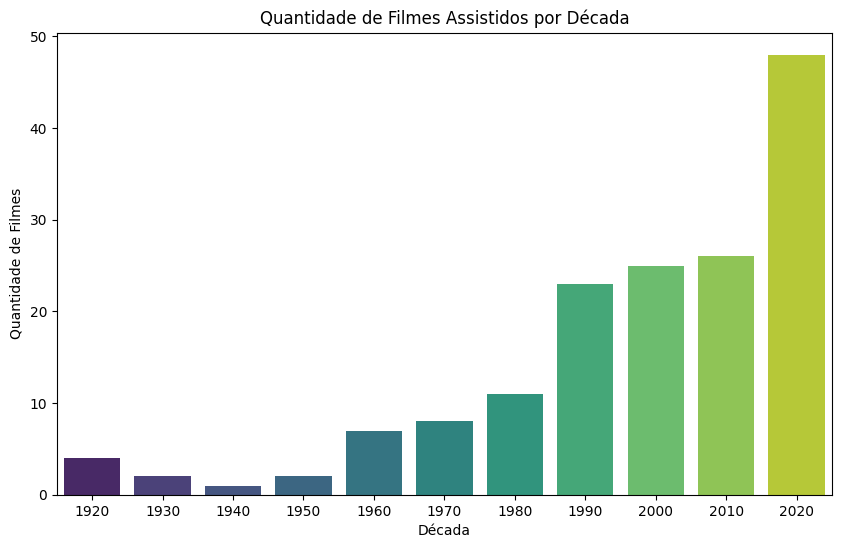

In [8]:
df['Decada'] = (df['Ano'] // 10) * 10

# Contar quantos filmes temos em cada década
filmes_por_decada = df['Decada'].value_counts().sort_index()

# Plotando o gráfico
plt.figure(figsize=(10, 6))
sns.barplot(x=filmes_por_decada.index, y=filmes_por_decada.values, palette="viridis")

# Adicionando título e rótulos
plt.title('Quantidade de Filmes Assistidos por Década')
plt.xlabel('Década')
plt.ylabel('Quantidade de Filmes')

# Exibir o gráfico
plt.show()

## 4. Países assistidos

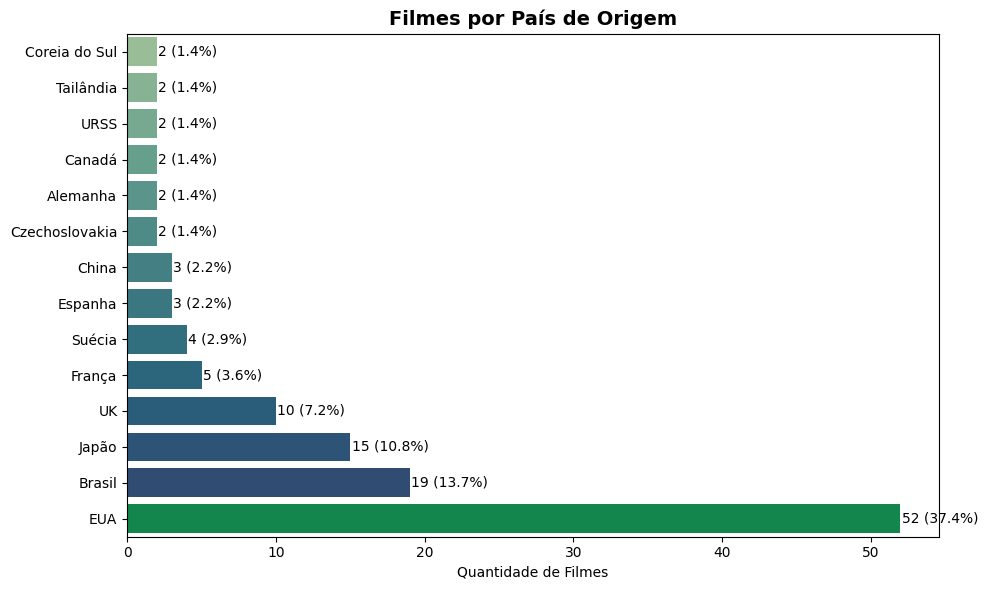

Países com apenas 1 filme:
Hong Kong, Itália, Guiné-Bissau, Bélgica, Grécia, Letônia, Chile, Irlanda, Rússia, Coreia do Norte, Geórgia, Nova Zelândia, Argentina, Dinamarca, Mauritânia, Cuba


In [9]:
# --- Preparar dados ---
df_unicos = df.drop_duplicates(subset=['Título original'])
df_paises = df_unicos.assign(País=df_unicos['País'].str.split(', '))
df_paises = df_paises.explode('País')

contagem_paises = df_paises['País'].value_counts()

# Filtrar top países
limite = 2
paises_top = contagem_paises[contagem_paises >= limite]
paises_1 = contagem_paises[contagem_paises == 1].index.tolist()

# DataFrame para plot
df_paises_plot = paises_top.reset_index()
df_paises_plot.columns = ['País', 'Quantidade']
df_paises_plot = df_paises_plot.sort_values('Quantidade', ascending=True)

# Paleta de cores (verde no mais frequente)
cores = sns.color_palette("crest", n_colors=len(df_paises_plot))
cores[-1] = (0.0, 0.6, 0.3)

# --- Plot ---
plt.figure(figsize=(10, 6))
sns.barplot(
    data=df_paises_plot,
    x='Quantidade',
    y='País',
    hue='País',
    palette=cores,
    dodge=False,
    legend=False
)

# Rótulos com valores e %
total_filmes = contagem_paises.sum()
for index, value in enumerate(df_paises_plot['Quantidade']):
    plt.text(value + 0.1, index, f"{value} ({value/total_filmes:.1%})", va='center')

plt.title('Filmes por País de Origem', fontsize=14, weight='bold')
plt.xlabel('Quantidade de Filmes')
plt.ylabel('')
plt.tight_layout()
plt.show()

# --- Imprimir países com apenas 1 filme ---
if paises_1:
    print("Países com apenas 1 filme:")
    print(", ".join(paises_1))
